In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)

2023-09-23 12:11:23.514027: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.0


### Define and compile the Neural Network

Next, you will create the simplest possible neural network. It has 1 layer with 1 neuron, and the input shape to it is just 1 value. You will build this model using Keras' [Sequential](https://keras.io/api/models/sequential/) class which allows you to define the network as a sequence of [layers](https://keras.io/api/layers/). You can use a single [Dense](https://keras.io/api/layers/core_layers/dense/) layer to build this simple network as shown below.


In [2]:
# create the simplest neural network.
# 1 layer, 1 neuron, with input shape 1
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Now, you will compile the neural network. When you do so, you have to specify 2 functions: a [loss](https://keras.io/api/losses/) and an [optimizer](https://keras.io/api/optimizers/).

If you've seen lots of math for machine learning, here's where it's usually used. But in this case, it's nicely encapsulated in functions and classes for you. But what happens here? Let's explain...

You know that in the function declared at the start of this notebook, the relationship between the numbers is `y=2x-1`. When the computer is trying to 'learn' that, it makes a guess... maybe `y=10x+10`. The `loss` function measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses the `optimizer` function to make another guess. Based on how the loss function went, it will try to minimize the loss. At that point maybe it will come up with something like `y=5x+5`, which, while still pretty bad, is closer to the correct result (i.e. the loss is lower).

It will repeat this for the number of _epochs_ which you will see shortly. But first, here's how you will tell it to use [mean squared error](https://keras.io/api/losses/regression_losses/#meansquarederror-function) for the loss and [stochastic gradient descent](https://keras.io/api/optimizers/sgd/) for the optimizer. You don't need to understand the math for these yet, but you can see that they work!

Over time, you will learn the different and appropriate loss and optimizer functions for different scenarios.


In [3]:
model.compile(optimizer='sgd', loss='mean_squared_error')

### Provide the data

In [4]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

Train the network

In [5]:
model.fit(xs,ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 391ms/step - loss: 6.6682
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 5.4341
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 4.4594
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 3.6887
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 3.0787
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 2.5951
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 2.2111
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 1.9055
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 1.6617
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 1.4665
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 1.3097
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 1.1831
Epoch 13/500
1/1 [==============================] - 0s 5ms/

### Predict
---

100 epochs -> 17.83
500 epochs -> 18.993475

In [6]:
model.predict([10])

1/1 [==============================] - 0s 96ms/step


array([[18.983759]], dtype=float32)

### Recap
---

Import libraries

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.13.0


Build the network

In [8]:
model2 = tf.keras.Sequential(keras.layers.Dense(units=1, input_shape = [1]))

Compile

In [9]:
model2.compile(optimizer='sgd', loss='mean_squared_error')

Provide Data

In [10]:
xs2 = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys2 = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

Train

In [11]:
model2.fit(xs2, ys2, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 421ms/step - loss: 33.8656
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 26.9734
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 21.5442
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 17.2661
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 13.8938
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 11.2342
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 9.1356
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 7.4784
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 6.1687
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 5.1323
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 4.3113
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 3.6597
Epoch 13/500
1/1 [==============================] - 0

Predict

In [12]:
model2.predict([10])

1/1 [==============================] - 0s 63ms/step


array([[18.978489]], dtype=float32)

### Convergence

In [53]:
import matplotlib.pyplot as plt

In [109]:
n_epochs = []
y_pred = []
for epochs in range(1,100):

    model3 = tf.keras.Sequential(keras.layers.Dense(units=1, input_shape = [1]))
    model3.compile(optimizer='sgd', loss='mean_squared_error')
    model3.fit(xs, ys, epochs=epochs, verbose=0)
    n_epochs.append(epochs)
    y_pred.append(model3.predict([10], verbose=0)[0][0])

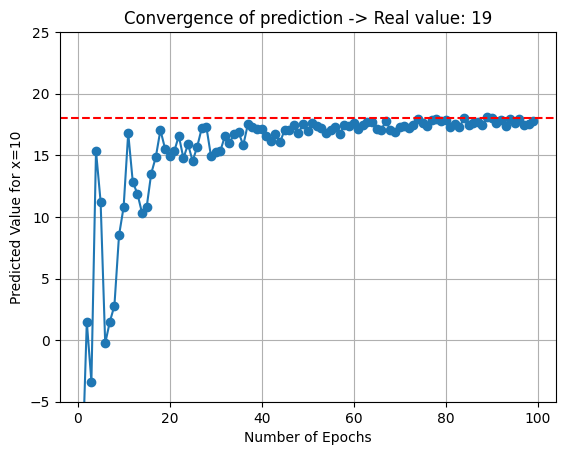

In [110]:
# Plotting n_epochs vs y_pred
plt.plot(n_epochs, y_pred, marker='o', linestyle='-')
plt.axhline(y=18, color='red', linestyle='--', label='Horizontal Line at y=18')
plt.plot()
plt.xlabel('Number of Epochs')
plt.ylabel('Predicted Value for x=10')
plt.title('Convergence of prediction -> Real value: 19')

# Set the y-axis limits to go up to 20
plt.ylim(-5, 25)

plt.grid(True)
plt.show()